In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from math import sqrt, pi
from scipy import stats

ModuleNotFoundError: No module named 'numpy'

In [ ]:
#Свойства модели
#Неколлектор: Vp=2500.000000, Vs=961.500000, den=2.400000
#Водонасыщенный коллектор: Vp=3200.000000, Vs=1777.800000, den=2.500000
#Газонасыщенный коллектор: Vp=2608.700000, Vs=1694.000000, den=2.300000

In [ ]:
model = np.ones((100,200)) # каркас 3Д модели, состоящий из единиц
model2 = model.copy()
model2[:,25:50] *= 1.4
model2[:,90:100] *= 2
model2[:,100:110] *= 1.4
model2[:,150:160] *= 2

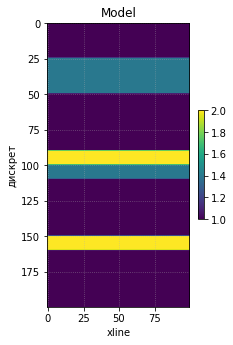

In [ ]:
plt.figure(figsize=(7, 10)) # создание рисунка
plt.subplot(121) # разделение поля визуализации на 1 строку и 2 столбца (т.е. логика (строк, столбцов, элемент))
plt.imshow(model2[:,:].transpose()) # визуализация первого сечения по первой оси
plt.title('Model')
plt.xlabel('xline') # подпись оси
plt.ylabel('дискрет') # подпись оси
plt.grid(ls=':',alpha=.5) # добавление сетки
plt.colorbar(shrink=0.2) # добавление цветовой шкалы

In [ ]:
vp, vs, den = np.ones(200)*2500, np.ones(200)*950, np.ones(200)*2.4

In [ ]:
vp[:25] -= 0
vs[:25] -= 0
den[:25] -= 0

vp[25:50] += 700
vs[25:50] += 827.8
den[25:50] += 0.1

vp[50:90] -= 0
vs[50:90] -= 0
den[50:90] -= 0

vp[90:100] += 100
vs[90:100] += 750
den[90:100] -= 0.1

vp[100:110] += 700
vs[100:110] += 827.8
den[100:110] += 0.1

vp[110:150] += 0
vs[110:150] += 0
den[110:150] += 0

vp[150:160] += 100
vs[150:160] += 750
den[150:160] -= 0.1



(200.0, 0.0)

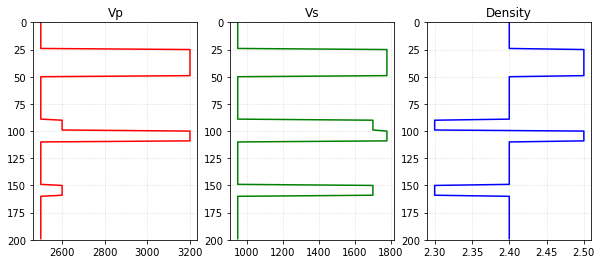

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.plot(vp, np.arange(200), 'r')
plt.title('Vp')
plt.grid(ls=':',alpha=.5)
plt.ylim(200,0)

plt.subplot(132)
plt.plot(vs, np.arange(200), 'g')
plt.title('Vs')
plt.grid(ls=':',alpha=.5)
plt.ylim(200,0)

plt.subplot(133)
plt.plot(den, np.arange(200), 'b')
plt.title('Density')
plt.grid(ls=':',alpha=.5)
plt.ylim(200,0)

In [ ]:
def zoeppritz_rpp(vp1, vs1, rho1, vp2, vs2, rho2, theta1=0): #Вычисление коэф.отражения при заданном угл. падения
    """
    Exact Zoeppritz from expression.
    Dvorkin et al. (2014). Seismic Reflections of Rock Properties. Cambridge.
    Returns the complex reflectivity.

    """
    theta1 = np.radians(theta1).astype(complex)

    p = np.sin(theta1) / vp1  # Ray parameter
    theta2 = np.arcsin(p * vp2)
    phi1 = np.arcsin(p * vs1)  # Reflected S
    phi2 = np.arcsin(p * vs2)  # Transmitted S

    a = rho2 * (1 - 2 * np.sin(phi2)**2.) - rho1 * (1 - 2 * np.sin(phi1)**2.)
    b = rho2 * (1 - 2 * np.sin(phi2)**2.) + 2 * rho1 * np.sin(phi1)**2.
    c = rho1 * (1 - 2 * np.sin(phi1)**2.) + 2 * rho2 * np.sin(phi2)**2.
    d = 2 * (rho2 * vs2**2 - rho1 * vs1**2)

    E = (b * np.cos(theta1) / vp1) + (c * np.cos(theta2) / vp2)
    F = (b * np.cos(phi1) / vs1) + (c * np.cos(phi2) / vs2)
    G = a - d * np.cos(theta1)/vp1 * np.cos(phi2)/vs2
    H = a - d * np.cos(theta2)/vp2 * np.cos(phi1)/vs1

    D = E*F + G*H*p**2

    rpp = (1/D) * (F*(b*(np.cos(theta1)/vp1) - c*(np.cos(theta2)/vp2)) \
                   - H*p**2 * (a + d*(np.cos(theta1)/vp1)*(np.cos(phi2)/vs2)))

    return np.squeeze(rpp)

In [ ]:
ang = np.arange(0, 45)
rpp = np.zeros((len(vp), len(ang)))
gath = np.zeros(rpp.shape)

dt = 0.002 # Шаг дискретизации
points = 75 # длина вейвлета в дискретах
sign_freq = 30 # частота вейвлета

bfreq = 1./dt # Частота дискретизации
a = bfreq/(sqrt(2.0)*pi*sign_freq) # Масштаб дискрета

for j in range(len(ang)):
    for i in range(len(vp)-1):
        rpp[i, j] = zoeppritz_rpp(vp[i], vs[i], den[i], vp[i+1], vs[i+1], den[i+1], theta1=ang[j])
    
    gath[:,j] = np.convolve(rpp[:, j], signal.ricker(points, a), mode='same')

C:\Users\Алина\AppData\Local\Temp\ipykernel_5400\3209980347.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  rpp[i, j] = zoeppritz_rpp(vp[i], vs[i], den[i], vp[i+1], vs[i+1], den[i+1], theta1=ang[j])


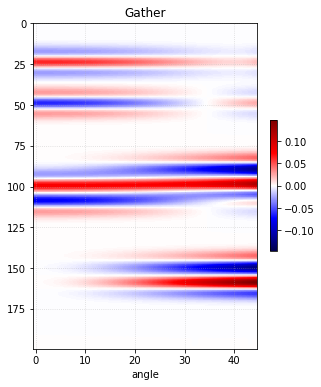

In [ ]:

plt.figure(figsize=(5,6))
plt.title('Gather')
plt.xlabel('angle')
plt.imshow(gath, aspect='auto', vmin = - gath.max(), vmax = gath.max(), cmap='seismic')
plt.grid(ls=':',alpha=.5)
plt.colorbar(shrink=0.4)

In [ ]:
#Изменение амплитуды в зависимости от угла падения в sin^2

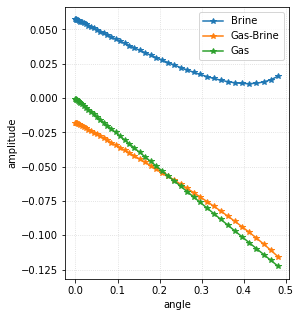

In [ ]:
plt.figure(figsize=(4,5))
plt.plot(np.sin(np.deg2rad(ang))**2, gath[25, :], '-*', label='Brine')
plt.plot(np.sin(np.deg2rad(ang))**2, gath[90, :], '-*', label='Gas-Brine')
plt.plot(np.sin(np.deg2rad(ang))**2, gath[150, :], '-*', label='Gas')
plt.grid(ls=':',alpha=.5)
plt.ylabel('amplitude')
plt.xlabel('angle')
plt.legend()

In [ ]:
from scipy import stats

x = np.sin(np.deg2rad(ang))**2 # значения синуса угла
y = gath[25, :] # значения амплитуды

gradient, intercept = stats.linregress(x, y)[0:2] # подбор регрессии

In [ ]:
print('интерсепт: %.2f\nградиент: %.2f' % (intercept, gradient))

интерсепт: 0.05
градиент: -0.11


In [ ]:
intercept = np.zeros(gath.shape[0])
gradient = np.zeros(gath.shape[0])

x = np.sin(np.deg2rad(ang))**2 

for i in range(gath.shape[0]):
    y = gath[i, :] #
    gradient[i], intercept[i] = stats.linregress(x, y)[0:2] # подбор регрессии

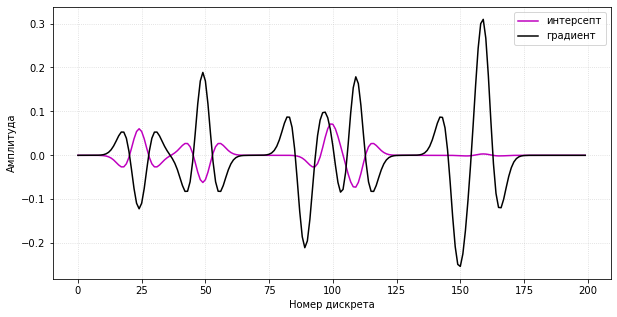

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(intercept, 'm', label='интерсепт')
plt.plot(gradient, 'k', label='градиент')
plt.xlabel('Номер дискрета')
plt.ylabel('Амплитуда')
plt.grid(ls=':',alpha=.5)
plt.legend()

In [ ]:
#В газонасыщенных интервалах градиент имеет наибольшую амлитуду
#В газонасыщенных интервалах интерсепт имеет наименьшую амплитуду